# Diabetes Health Indicators - Exploratory Data Analysis
This notebook analyzes the BRFSS2015 dataset to understand the relationships between lifestyle factors and diabetes risks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
plt.style.use('ggplot')
sns.set_palette('viridis')
%matplotlib inline

In [2]:
# Load Data
data_path = '../data/diabetes_012_health_indicators_BRFSS2015.csv'
try:
    df = pd.read_csv(data_path)
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    display(df.head())
except FileNotFoundError:
    print("Data file not found. Please ensure the data is extracted in the 'data' directory.")

Dataset Shape: (253680, 22)
Columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Data Validation
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Missing Values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64


## 1. Target Variable Distribution
Understanding the imbalance in the `Diabetes_012` class.
- 0: No Diabetes
- 1: Pre-diabetes
- 2: Diabetes

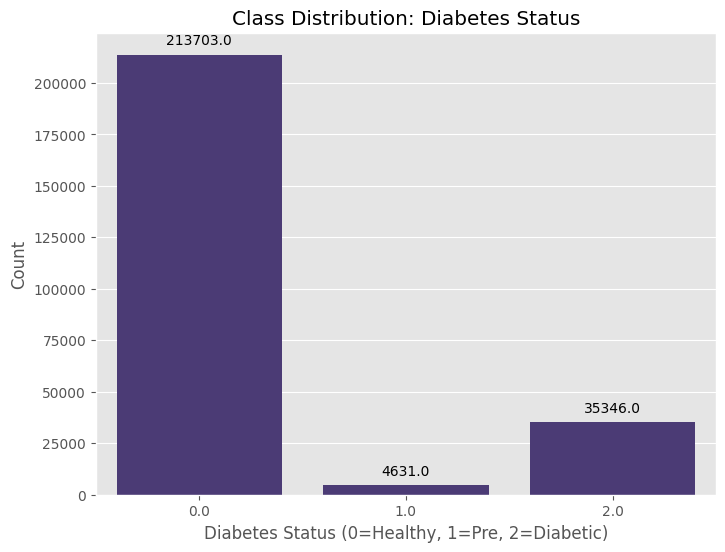

In [4]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes_012', data=df)
plt.title('Class Distribution: Diabetes Status')
plt.xlabel('Diabetes Status (0=Healthy, 1=Pre, 2=Diabetic)')
plt.ylabel('Count')

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## 2. Correlation Analysis
Checking which features correspond most strongly with Diabetes.

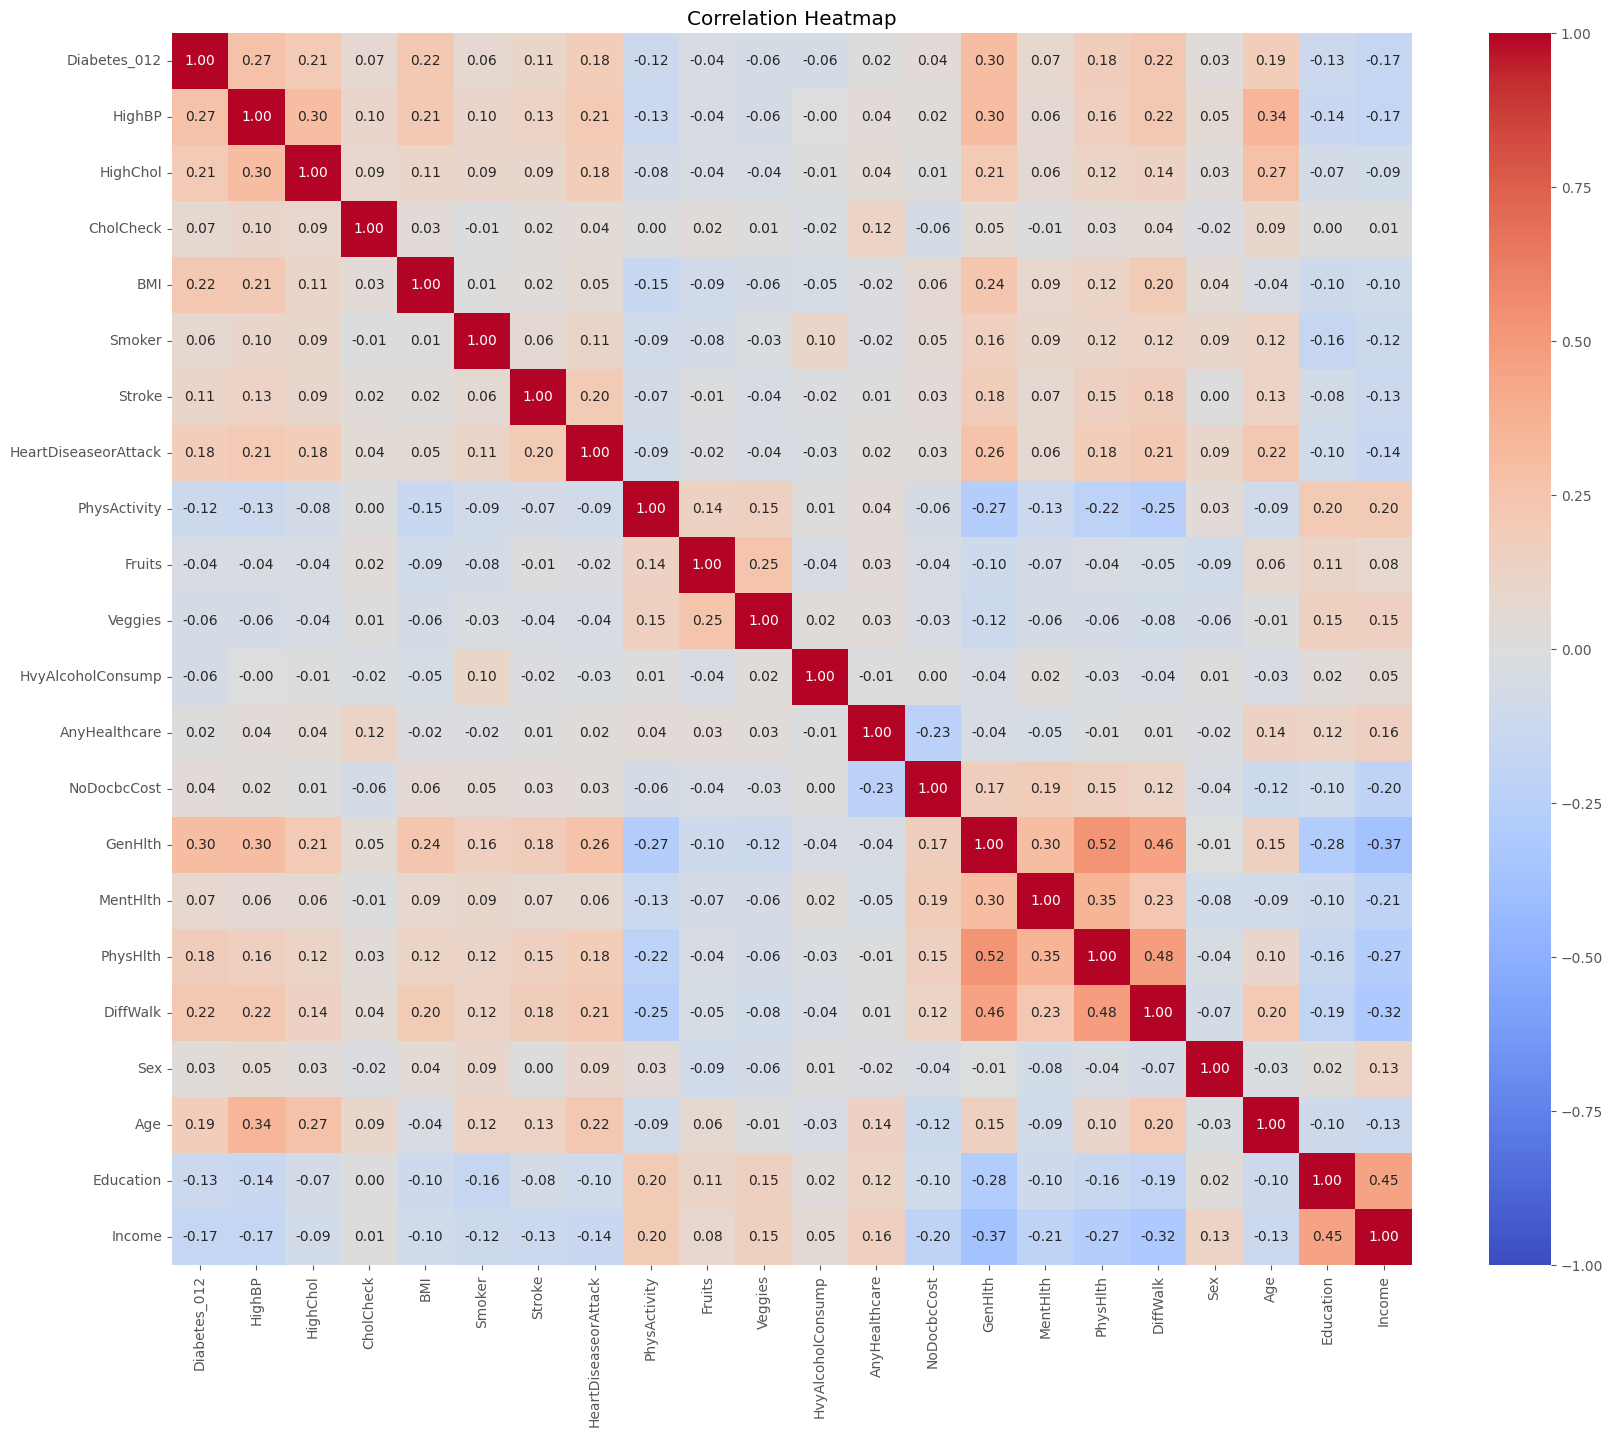

In [5]:
plt.figure(figsize=(20, 16))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

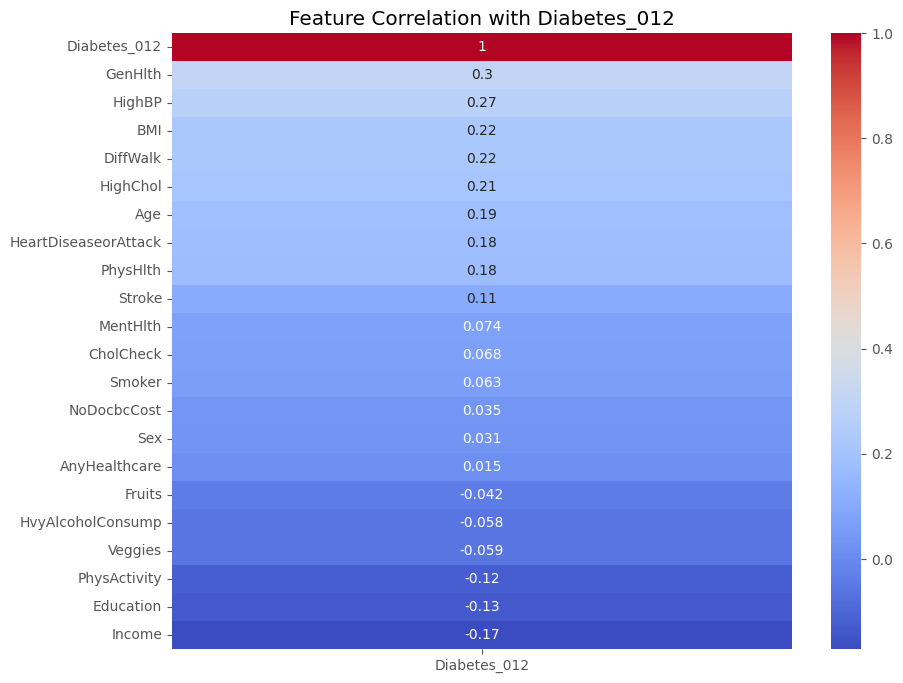

In [6]:
# Zoom in on correlations with Target
plt.figure(figsize=(10, 8))
subset = corr[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False)
sns.heatmap(subset, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Diabetes_012')
plt.show()

## 3. Key Factor Analysis
Boxplots to see how continuous variables (BMI, PhysHlth, GenHlth) differ across diabetes classes.

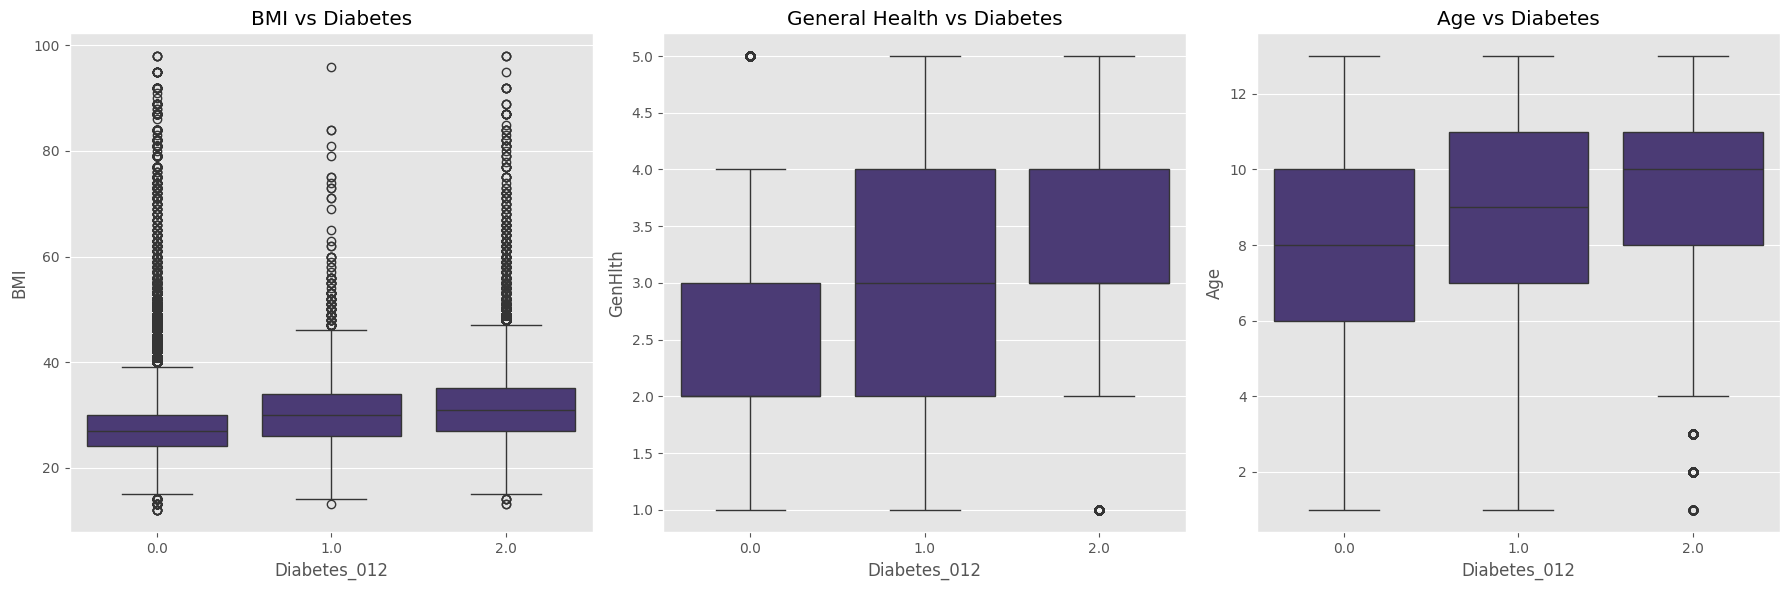

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Diabetes_012', y='BMI', data=df, ax=axes[0])
axes[0].set_title('BMI vs Diabetes')

sns.boxplot(x='Diabetes_012', y='GenHlth', data=df, ax=axes[1])
axes[1].set_title('General Health vs Diabetes')

sns.boxplot(x='Diabetes_012', y='Age', data=df, ax=axes[2])
axes[2].set_title('Age vs Diabetes')

plt.tight_layout()
plt.show()

## 4. Lifestyle Factors
Checking binary lifestyle flags.

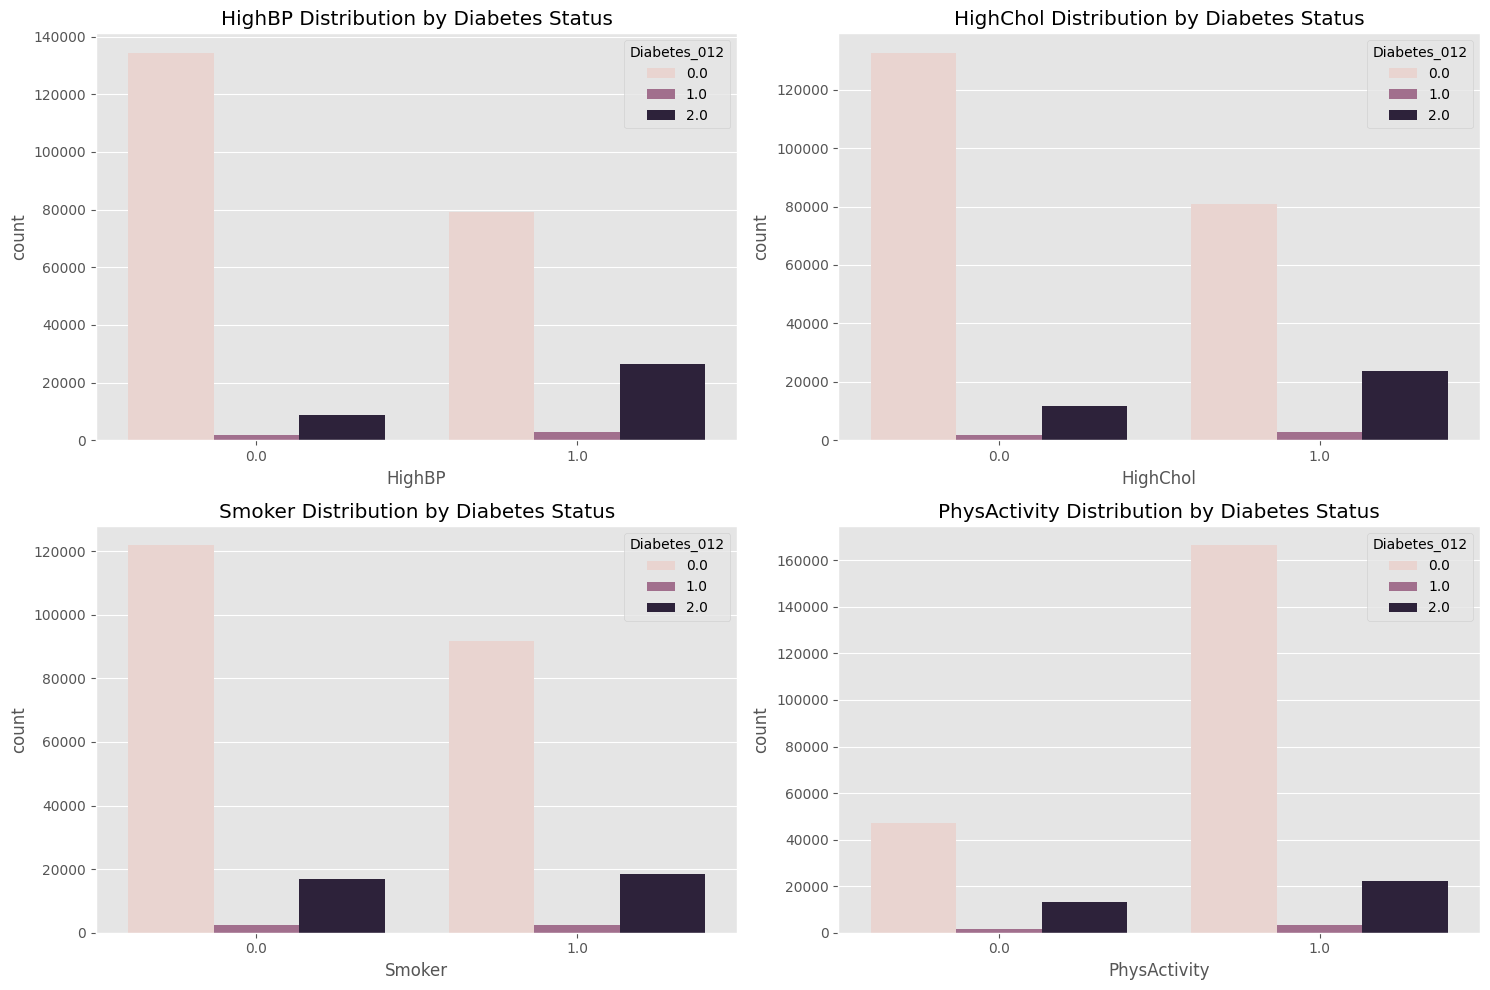

In [8]:
cols = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='Diabetes_012', data=df)
    plt.title(f'{col} Distribution by Diabetes Status')

plt.tight_layout()
plt.show()